In [1]:
#practice for the Big Data Analytics course
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt


In [2]:
%matplotlib inline

In [8]:
def f(x):
    return np.exp(3 * x)

In [9]:
x_tr = np.linspace(0., 2, 200)
y_tr = f(x_tr)

In [10]:
x = np.array([0, .1, .2, .5, .8, .9, 1])
y = f(x) + 2 * np.random.randn(len(x))

Text(0.5, 1.0, 'Generative model')

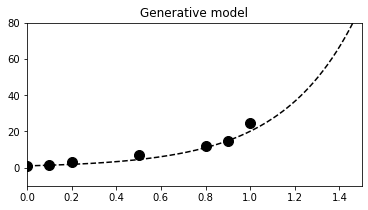

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_tr, y_tr, '--k')
ax.plot(x, y, 'ok', ms=10)
ax.set_xlim(0, 1.5)
ax.set_ylim(-10, 80)
ax.set_title('Generative model')

In [12]:
#create the model
lr = lm.LinearRegression()
#Train the model on training dataset
lr.fit(x[:, np.newaxis], y)
# predict points with trained model
y_lr = lr.predict(x_tr[:, np.newaxis])

Text(0.5, 1.0, 'Linear regression')

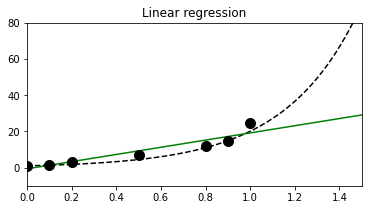

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_tr, y_tr, '--k')
ax.plot(x_tr, y_lr, 'g')
ax.plot(x, y, 'ok', ms=10)
ax.set_xlim(0, 1.5)
ax.set_ylim(-10, 80)
ax.set_title('Linear regression')

Coefficients, degree 2:
	 24.88 -5.06 0.00
Coefficients, degree 5:
	 314.65 -641.88 448.13 -117.01 19.90 0.00


Text(0.5, 1.0, 'Linear regression')

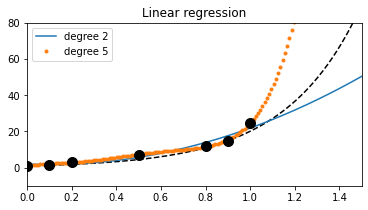

In [16]:
lrp = lm.LinearRegression()
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_tr, y_tr, '--k')

for deg, s in zip([2, 5], ['-', '.']):
    lrp.fit(np.vander(x, deg +1) , y)
    y_lrp = lrp.predict(np.vander(x_tr, deg + 1))
    ax.plot(x_tr, y_lrp, s,
           label=f'degree {deg}')
    ax.legend(loc=2)
    ax.set_xlim(0, 1.5)
    ax.set_ylim(-10, 80)
    
    #Print model's coefficients
    print(f'Coefficients, degree {deg}:\n\t',
         ' '.join(f'{c:.2f}' for c in lrp.coef_))
ax.plot(x, y, 'ok', ms=10)
ax.set_title("Linear regression")

Coefficients, degree 2: 12.62 6.55 0.00
Coefficients, degree 5: 5.90 4.54 3.40 2.98 4.27 0.00


Text(0.5, 1.0, 'Ridge regression')

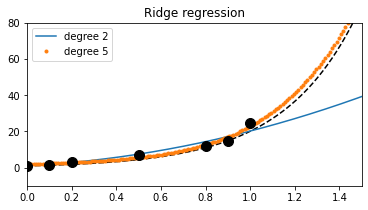

In [17]:
ridge = lm.RidgeCV()

fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_tr, y_tr, '--k')

for deg, s in zip([2, 5], ['-', '.']):
    ridge.fit(np.vander(x, deg + 1), y)
    y_ridge = ridge.predict(np.vander(x_tr, deg + 1))
    ax.plot(x_tr, y_ridge, s,
            label='degree ' + str(deg))
    ax.legend(loc=2)
    ax.set_xlim(0, 1.5)
    ax.set_ylim(-10, 80)
    # Print the model's coefficients.
    print(f'Coefficients, degree {deg}:',
          ' '.join(f'{c:.2f}' for c in ridge.coef_))

ax.plot(x, y, 'ok', ms=10)
ax.set_title("Ridge regression")